# Effect of online external information on Intraday stock prices

FAuR PROJECT - Group 10

**Himalaya** **Savalia,** **P** **Suranjana,** **Sreyan** **Chatterjee,** **Wellington** **Daniel**

#Introduction

![business-candle-stick-graph-chart-stock-market_41981-1435[1].jpg](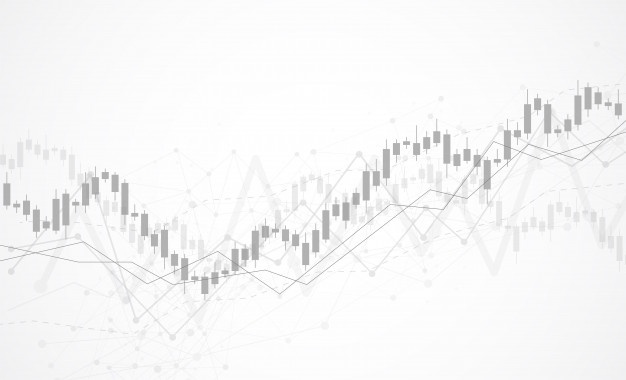)

This project aims to study the effects of intraday change in stock prices and volumes due the effects of online information source like twitter and an online portal called Money Control. The first part of the project deals with the use of sentiment analysis done on the Tweets by Google's official account on twitter. This is used to model the intraday returns. In the second part of the project we aim to see the performance of a trader who takes a long only position in the stocks listed by Moneycontrol. The trader buys the stock at the opening price for the particular stock and sells it at the closing price irrespective of the path movement of the stock. The trader prefers to trade on the National Stock Exchange (NSE) wherever possible. For some stocks which are listed only on the Bombay Stock Exchange (BSE), the trader takes a position in them only if they are not available on NSE.



# Litrature Review

Goonatilake, Rohitha & Herath, Susantha. (2007)[1] took DJIA, NASDAQ, and S&P 500 as three market indicators, while CNN headline news channel, Fox News Channel, yahoo and New York Times were used as news outlets. Data was collected over a period of ten weeks beginning July 2006. News items were categorized as Good (G), Bad (B) or Neutral (N) for each day. The chi-square independent test was performed to analyse the correlation between news and DJIA movements measured in terms of increase, decrease or unchanged. With chi- square test statistic 140.26, the null hypothesis was rejected at 0.05 significance level, suggesting correlation between news items and market fluctuations. 

Deveikyte, J., Geman, H., Piccari, C., & Provetti, A. (2020)[2] analyzed the strength of correlation between news headlines and twitter sentiments and market volatility and returns the next day. They have used topic modelling, based on Latent Dirichlet Allocation, to extract feature vectors from collection of tweets and financial news. With the combination of topic modelling and sentiment, the classifier was able to achieve accuracy of 63% for directional prediction for volatility. Correlation between stock market returns and sentiment score was found statistically significant for headline dataset only. Surprisingly, correlation coefficient for twitter sentiment and FTSE100 index returns was found to be -0.7 with p-value below 0.05. For volatility, strong correlation was found with twitter dataset, while no or weak correlation was found for headline and news stories dataset. This difference may be due to the fact that tweets are timelier and more reactive to various events, whereas news headlines are published after some time.

Colonescu, C. (2018)[3] examines the effects of Donald Trump’s tweets on stock markets and foreign exchange markets, represented by DJIA and few exchange rates. A time series of sentiments was constructed using a collection of over 3500 tweets, all the tweets Trump wrote since January 2017 to May 2018, from Trump Twitter Archive (2018). Text mining was done using tidyverse package and words were compared to a general purpose Lexicon called AFINN, which assigns sentiment score in the range of -5 to 5. Time series was calculated using average daily sentiment score and log return of DJIA. Both series were found to be stationary as per Augmented Dickey Fuller test and linear regression was carried out to find correlation between both series. The data analysis showed that correlation was significant for a short period of time but  not significant for long term. Same results were obtained for VIX series of S&P 500. The author notes that analysis is very sensitive to the choice moving average window. 

Zhang, Fuehres, and Gloor (2011)[4] used a collection of tweets collected over a six months period to determine correlation between average tweet sentiment and some market variables. A randomized sample of one hundredth of the volume of all tweets in given period was selected to measure daily score of hope or fear. Besides the DJIA, they also consider S&P 500, NASDAQ, and the VIX index. A negative correlation was found between emotion in general and the market price aggregates. However, a significantly positive correlation was found for the market volatility index.


# Effect of Twitter on intraday data

Tweets from Google are collected using the Twitter API. The sentiments of these tweets will be extracted and used as regressors for time series models. We were able to collect intraday price and volume information and we will be using the tweets to model and forecast future values.

<br>

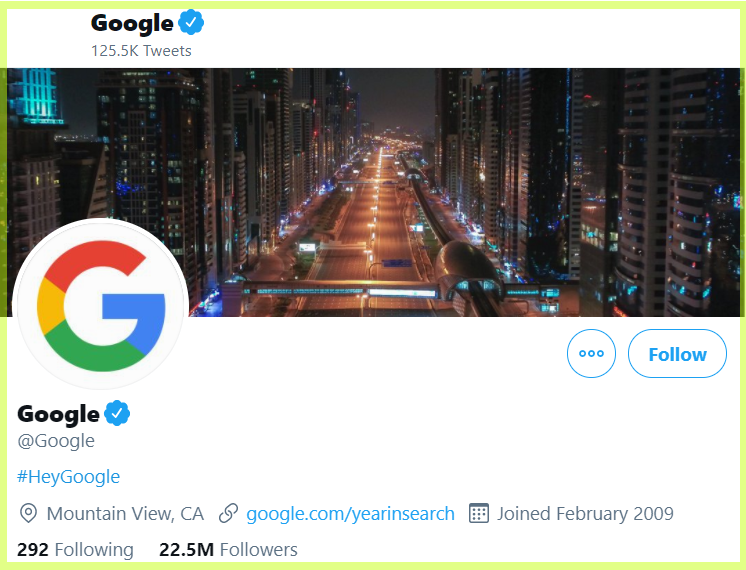

<br>

We have performed this multiple times and have found that the Volume of the tweets when modeled using the sentiment scores as regressors in an ARIMAX model fits really well and is better than a model without the regressor. However this is not always the case as evident from the below code outputs.

<br>

**Previous** **Result** **using** **sentiment** **scores** **and** **volume:**
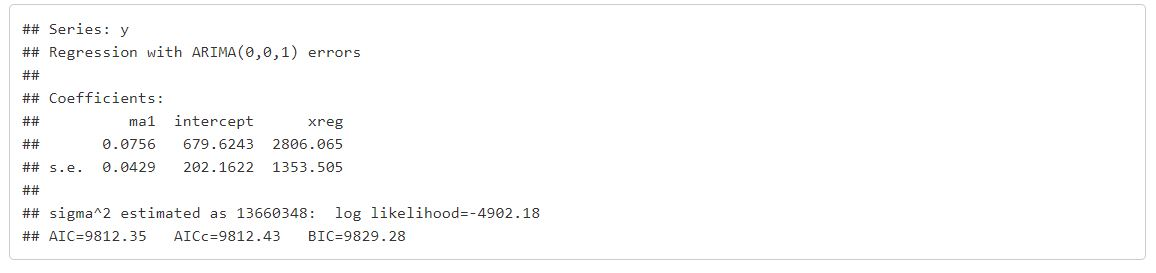

<br>

The sentiment scores of the tweets can be clustered according to price and sentiments and this can be used to model Volume. This has proved to be very significant in all of our attempts and this one as well.

## Required Packages

In [ ]:
install.packages("twitteR")
install.packages("tidyverse")
install.packages("tm")
install.packages("sentimentr")
install.packages("forecast")
install.packages("tseries")
install.packages("quantmod")
install.packages("readxl")

In [ ]:
library(twitteR)
library(tidyverse)
library(tm)
library(sentimentr)
library(forecast)
library(tseries)
library(quantmod)
library(readxl)

##API Key Authentication

In [ ]:
setup_twitter_oauth(api.key,api.secret,access.token,token.secret)

[1] "Using direct authentication"


## Extracting the tweets

In [ ]:
google.tweets <- userTimeline("Google", n = 3200)
google.tweets[1:5]
google.df = twListToDF(google.tweets)

[[1]]
[1] "Google: @LorraineMonroe Hi there. Let's see what we can do to help. Look out for a DM with next steps."

[[2]]
[1] "Google: @juswaaaexd Hi Juswa. Let's see what we can do to help. Please follow us and let us know when you have so we can sh… https://t.co/sZlBDFsiXV"

[[3]]
[1] "Google: @iampuria Mind if we jump in? Are you getting a specific error message when you try signing into your Google accoun… https://t.co/uDU3aULQFI"

[[4]]
[1] "Google: @MotoKemv2 Hmm. Have you already tried recovering your account by completing the steps here:… https://t.co/qTRbRvYHKy"

[[5]]
[1] "Google: @silentluverak Hmm. Let's see what we can do to help. Please follow us and let us know when you have so we can share next steps through DM."


In [ ]:
dim(google.df)

[1] 2801   16

## Extracting stock prices

In [ ]:
data <- read_excel("Google 1 min.xlsx")
data<-data[-1]
colnames(data)=c("date","price","volume")
data=data.frame(data)
head(data)

,date,price,volume
,<dttm>,<dbl>,<dbl>
1,2020-12-23 23:00:00,1726.570,523
2,2020-12-23 22:59:00,1726.050,276
3,2020-12-23 22:58:00,1726.070,1168
4,2020-12-23 22:57:00,1725.800,795
5,2020-12-23 22:56:00,1725.684,581
6,2020-12-23 22:55:00,1725.014,402


## Data preprocessing

In [ ]:
sent=sentiment(google.df$text)
sentfinal=aggregate(sent$sentiment,by=list(sent$element_id),FUN= "mean")

Warning message:
“Each time `sentiment` is run it has to do sentence boundary disambiguation when a
raw `character` vector is passed to `text.var`. This may be costly of time and
memory.  It is highly recommended that the user first runs the raw `character`
vector through the `get_sentences` function.”


In [ ]:
dim(sentfinal)[1]==length(google.tweets)

[1] TRUE

In [ ]:
sentscore=data.frame(date=google.df$created,sent=sentfinal$x)
sentscore$date=format(sentscore$date,format='%Y-%m-%d %H:%M')
sentscore1=aggregate(sentscore$sent,by=list(sentscore$date),FUN= "mean")
sentscore1=data.frame(sentscore1)
colnames(sentscore1)=c("date","sent")
sentscore1$date=as.POSIXct(sentscore1$date,tz="UCT")

In [ ]:
head(data)

,date,price,volume
,<dttm>,<dbl>,<dbl>
1,2020-12-23 23:00:00,1726.570,523
2,2020-12-23 22:59:00,1726.050,276
3,2020-12-23 22:58:00,1726.070,1168
4,2020-12-23 22:57:00,1725.800,795
5,2020-12-23 22:56:00,1725.684,581
6,2020-12-23 22:55:00,1725.014,402


In [ ]:
head(sentscore1)

,date,sent
,<dttm>,<dbl>
1,2020-11-18 11:08:00,0.25018512
2,2020-11-18 11:11:00,0.03726780
3,2020-11-18 11:16:00,0.26497137
4,2020-11-18 11:20:00,-0.12598816
5,2020-11-18 11:22:00,0.09701425
6,2020-11-18 11:24:00,0.00000000


In [ ]:
Fdata=merge(data,sentscore1)
summary(Fdata)

      date                         price          volume       
 Min.   :2020-11-18 17:37:00   Min.   :1695   Min.   :    1.0  
 1st Qu.:2020-12-02 20:45:00   1st Qu.:1728   1st Qu.:    4.0  
 Median :2020-12-15 17:07:30   Median :1755   Median :   26.0  
 Mean   :2020-12-11 11:45:05   Mean   :1753   Mean   : 1107.2  
 3rd Qu.:2020-12-21 15:55:15   3rd Qu.:1769   3rd Qu.:  990.5  
 Max.   :2020-12-23 22:03:00   Max.   :1832   Max.   :67113.0  
      sent         
 Min.   :-0.36000  
 1st Qu.: 0.00000  
 Median : 0.08729  
 Mean   : 0.08444  
 3rd Qu.: 0.14226  
 Max.   : 0.81192  

## Plots

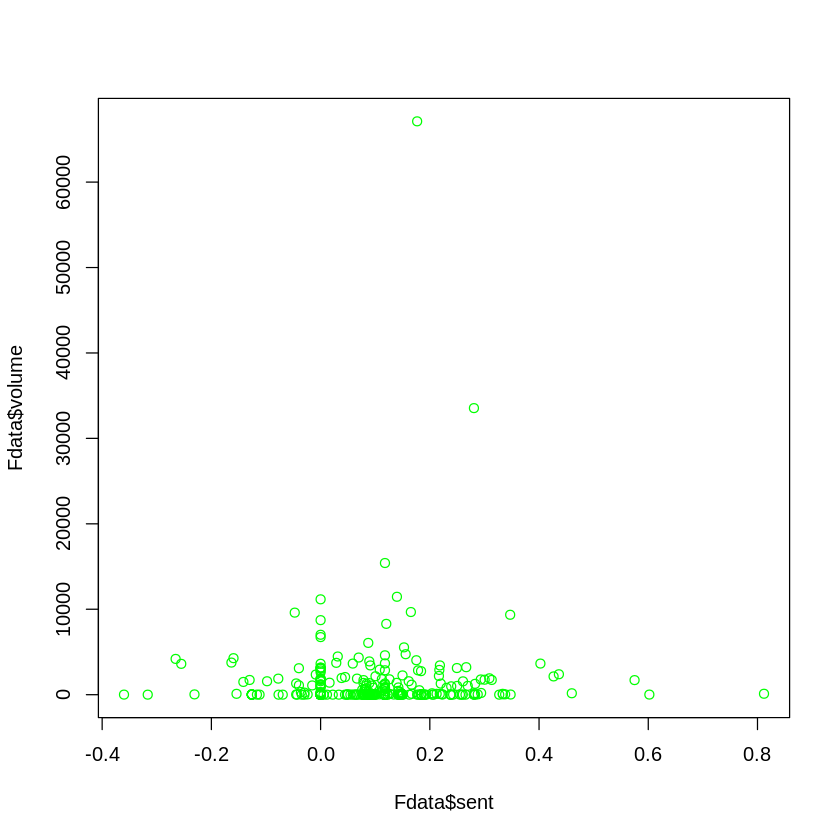

In [ ]:
plot(Fdata$volume~Fdata$sent,col="green")

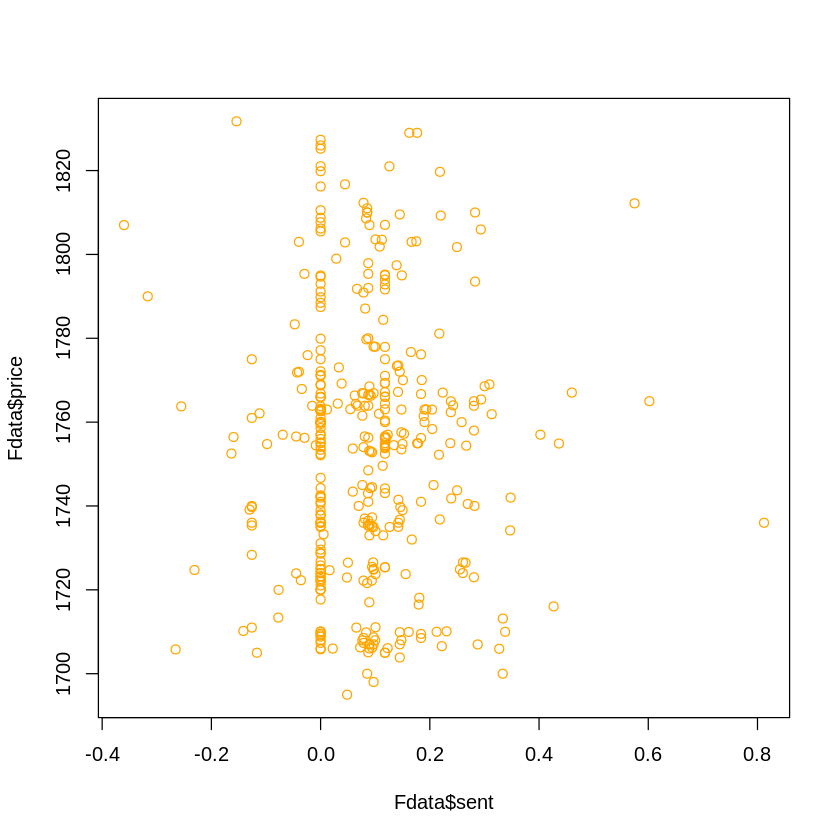

In [ ]:
plot(Fdata$price~Fdata$sent,col="orange")

## Volume

First we model the Volume with the help of the sentiment score.

In [ ]:
l=lm(Fdata$volume~Fdata$sent)
summary(l)


Call:
lm(formula = Fdata$volume ~ Fdata$sent)

Residuals:
   Min     1Q Median     3Q    Max 
 -2788  -1127   -897   -260  65779 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    899.6      264.3   3.404 0.000736 ***
Fdata$sent    2458.5     1753.5   1.402 0.161724    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4245 on 374 degrees of freedom
Multiple R-squared:  0.005229,	Adjusted R-squared:  0.002569 
F-statistic: 1.966 on 1 and 374 DF,  p-value: 0.1617


From linear regression, it can be seen that the sentiment score is not significant

## Time Series Analysis

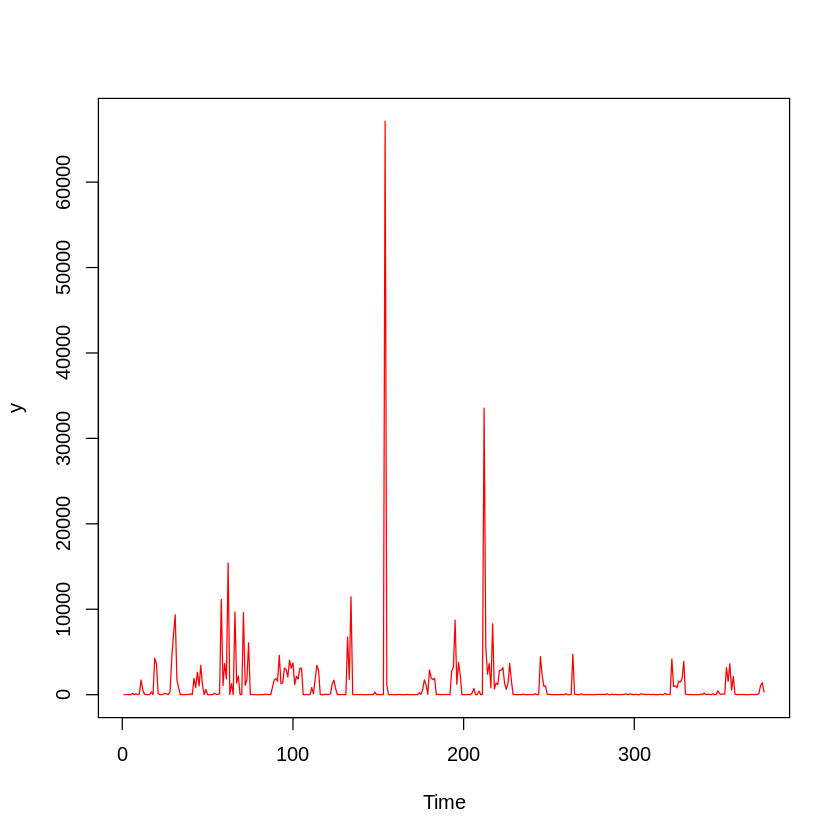

In [ ]:
y=as.ts(Fdata$volume,start=min(Fdata$date),end=max(Fdata$date))
plot(y,col="red")

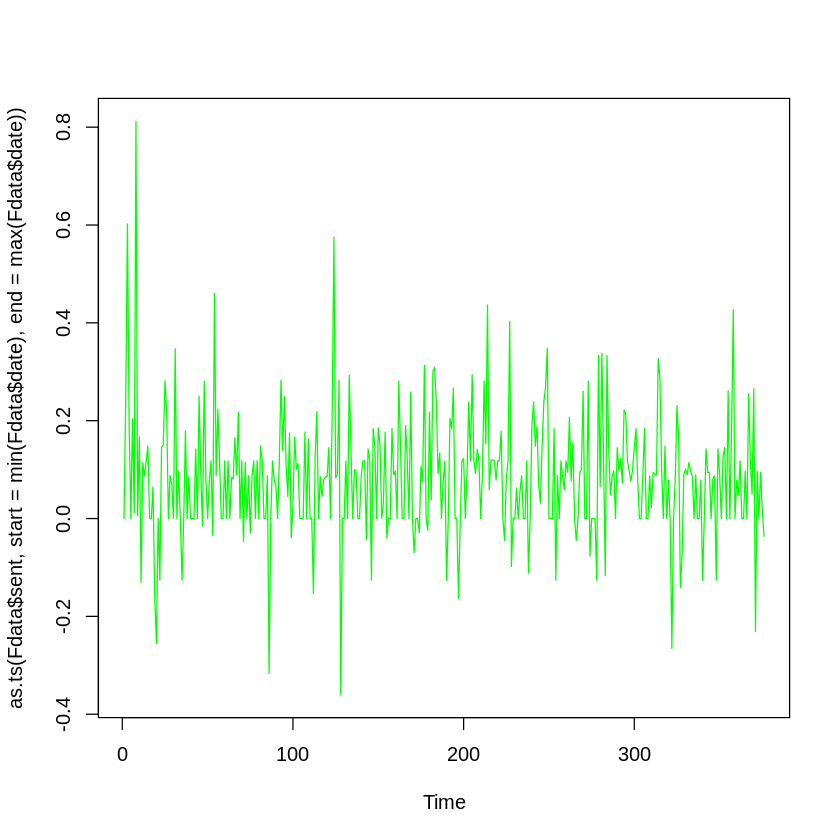

In [ ]:
plot(as.ts(Fdata$sent,start=min(Fdata$date),end=max(Fdata$date)),col="green")

## ACF/PACF

**Autocorrelation** **Function:**
The Autocorrelation function is the correlation between a Random time varying variable and its
own value in the past. The ACF plot can help understand the nature of the variable with respect
to time. With the ACF plot we can understand if the variable has a Moving Average component
i.e., the variable is dependent on its errors in the past.

**Partial** **Autocorrelation** **Function:**
The Partial Autocorrelation function helps understand if a variable has an Autoregressive
component. It is the coefficient of regression plotted against the value at present and value in
the past.

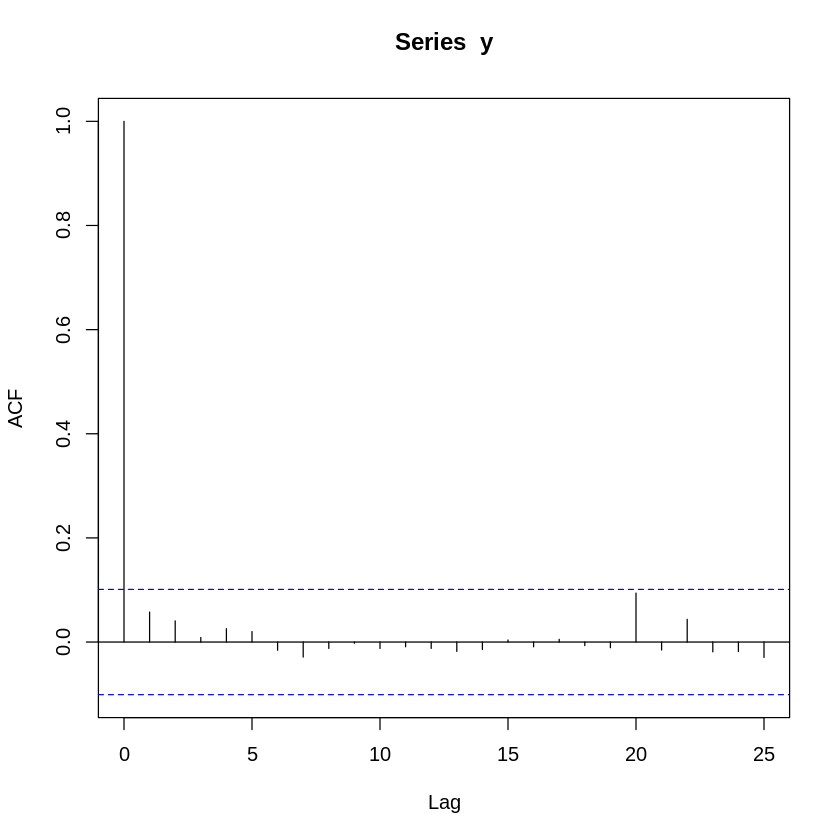

In [ ]:
acf(y)

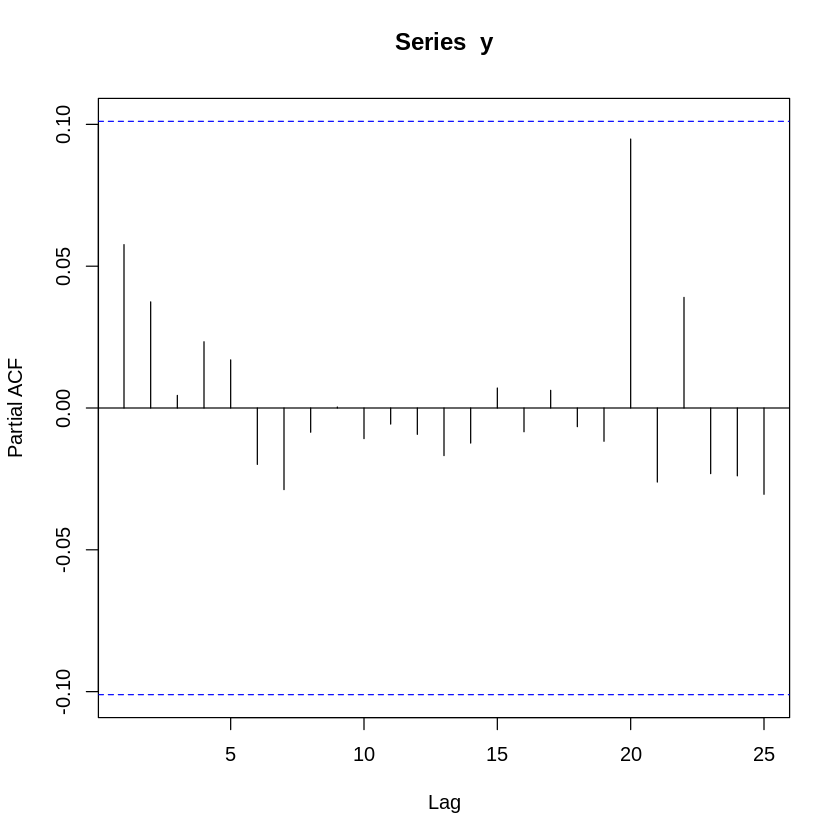

In [ ]:
pacf(y)

## ARIMAX modeling

In [ ]:
ARIMAX.outno=auto.arima(y = y)
ARIMAX.outno

Series: y 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
           mean
      1107.2287
s.e.   218.8863

sigma^2 estimated as 18062639:  log likelihood=-3674.38
AIC=7352.76   AICc=7352.79   BIC=7360.62

In [ ]:
ARIMAX.out=auto.arima(y = y, xreg = Fdata$sent)
ARIMAX.out

Series: y 
Regression with ARIMA(0,0,0) errors 

Coefficients:
      intercept      xreg
       899.6243  2458.505
s.e.   263.5690  1748.811

sigma^2 estimated as 18016239:  log likelihood=-3673.39
AIC=7352.79   AICc=7352.85   BIC=7364.58


**Lowest** **AIC/BIC:** ARIMA(0,0,0) with no regressor. 


**Note:** This result is opposite to what we got a few days ago where the fitted model was ARIMA (0,1,1) and the regressor was significant.

## Ljung-Box test

Ljung Box test on Residuals check if, after fitting the model, the residuals are just white noise
i.e. no predictability.
The Ljung Box test on the Residuals squared helps us to understand if there are conditional
heteroskedasticity

In [ ]:
Box.test(ARIMAX.out$residuals,type="Ljung")


	Box-Ljung test

data:  ARIMAX.out$residuals
X-squared = 0.0051239, df = 1, p-value = 0.9429


Alternate hypothesis is rejected. There is no autocorrelation between residuals.

In [ ]:
Box.test(ARIMAX.out$residuals^2,type="Ljung") 


	Box-Ljung test

data:  ARIMAX.out$residuals^2
X-squared = 0.96388, df = 1, p-value = 0.3262


Alternate hypothesis is rejected. There is no conditional heteroscedasticity.

## Price

Here we model the Price with clusters.

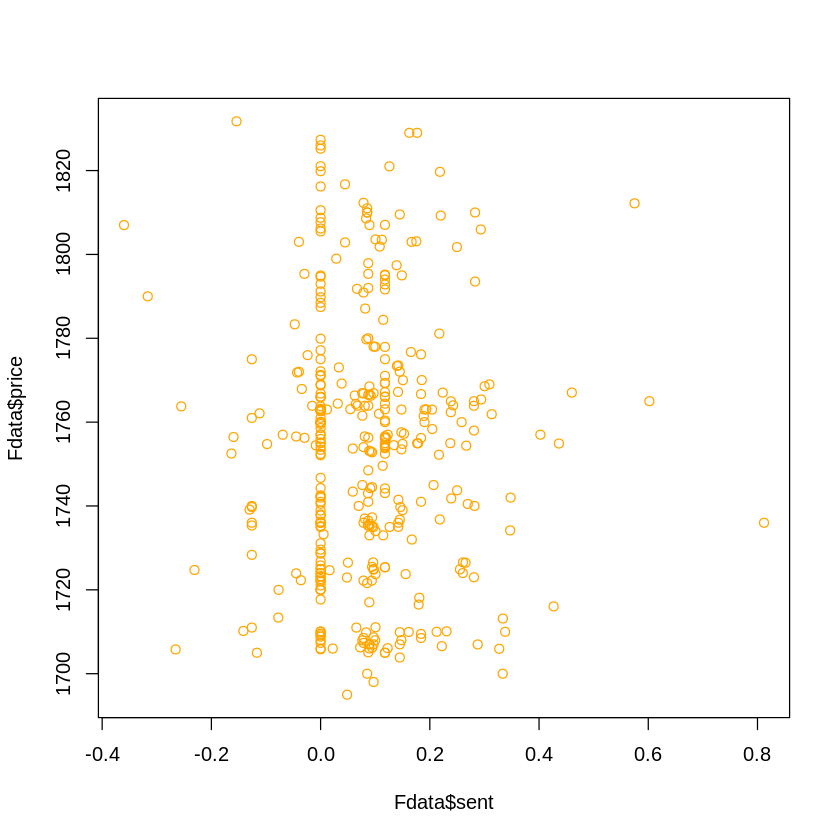

In [ ]:
plot(Fdata$price~Fdata$sent,col="orange")

Clusters can be seen in the plot.

## Clustering

The hierarchical clustering is done to plot the dendrograd and to identify number of clusters visually. Then K-means is finally used to cluster.

In [ ]:
d <- dist(Fdata[,c(2,4)])
h<-hclust(d)
h


Call:
hclust(d = d)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 376 


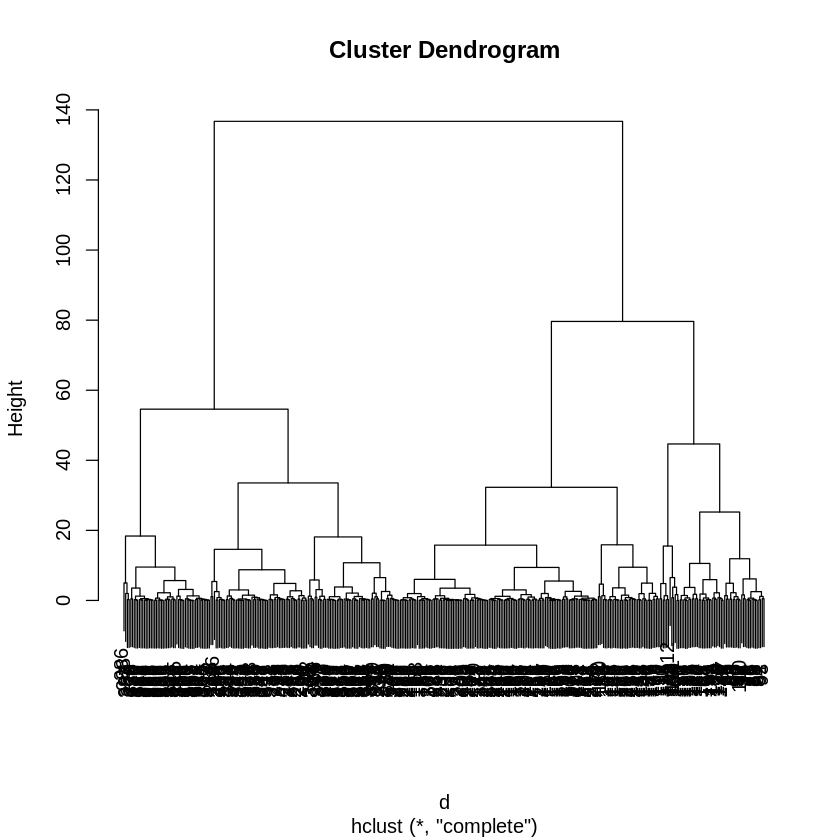

In [ ]:
plot(h)

In [ ]:
k=kmeans(Fdata[,c(2,4)],3)
k

K-means clustering with 3 clusters of sizes 143, 64, 169

Cluster means:
     price       sent
1 1721.851 0.07885003
2 1804.146 0.07299706
3 1760.948 0.09351090

Clustering vector:
  [1] 3 3 3 3 3 3 3 1 1 1 1 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 1 1 1 3 3 3 3 3
[260] 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[371] 1 1 1 1 1 1



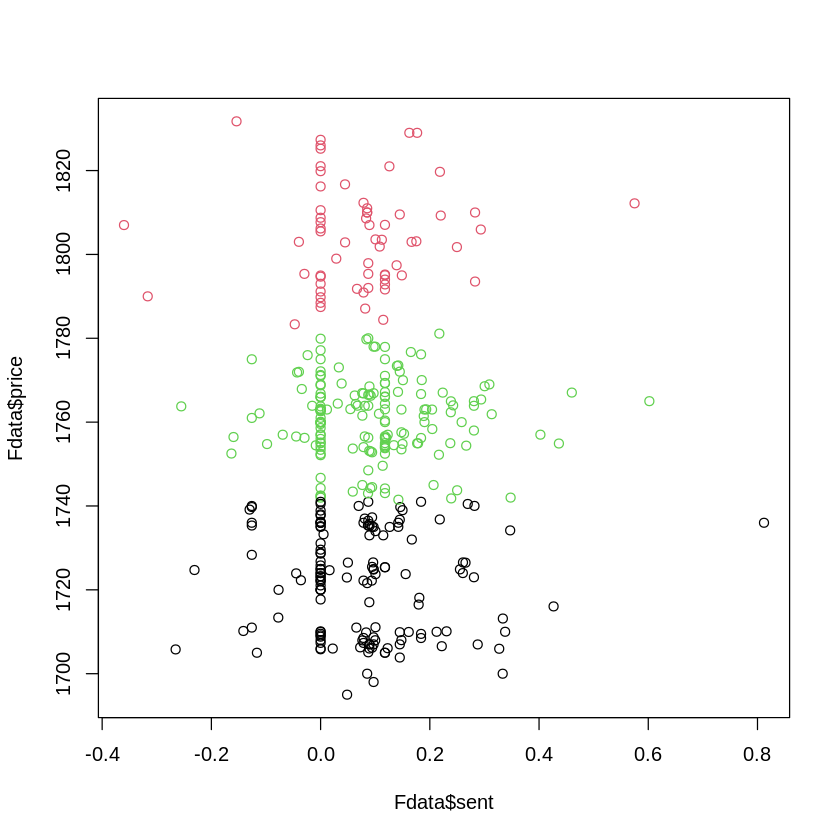

In [ ]:
plot(Fdata$price~Fdata$sent,col=k$cluster)

Previous attempts on using Twitter timeline tweets to cluster has given clusters which are more seperated from one another.
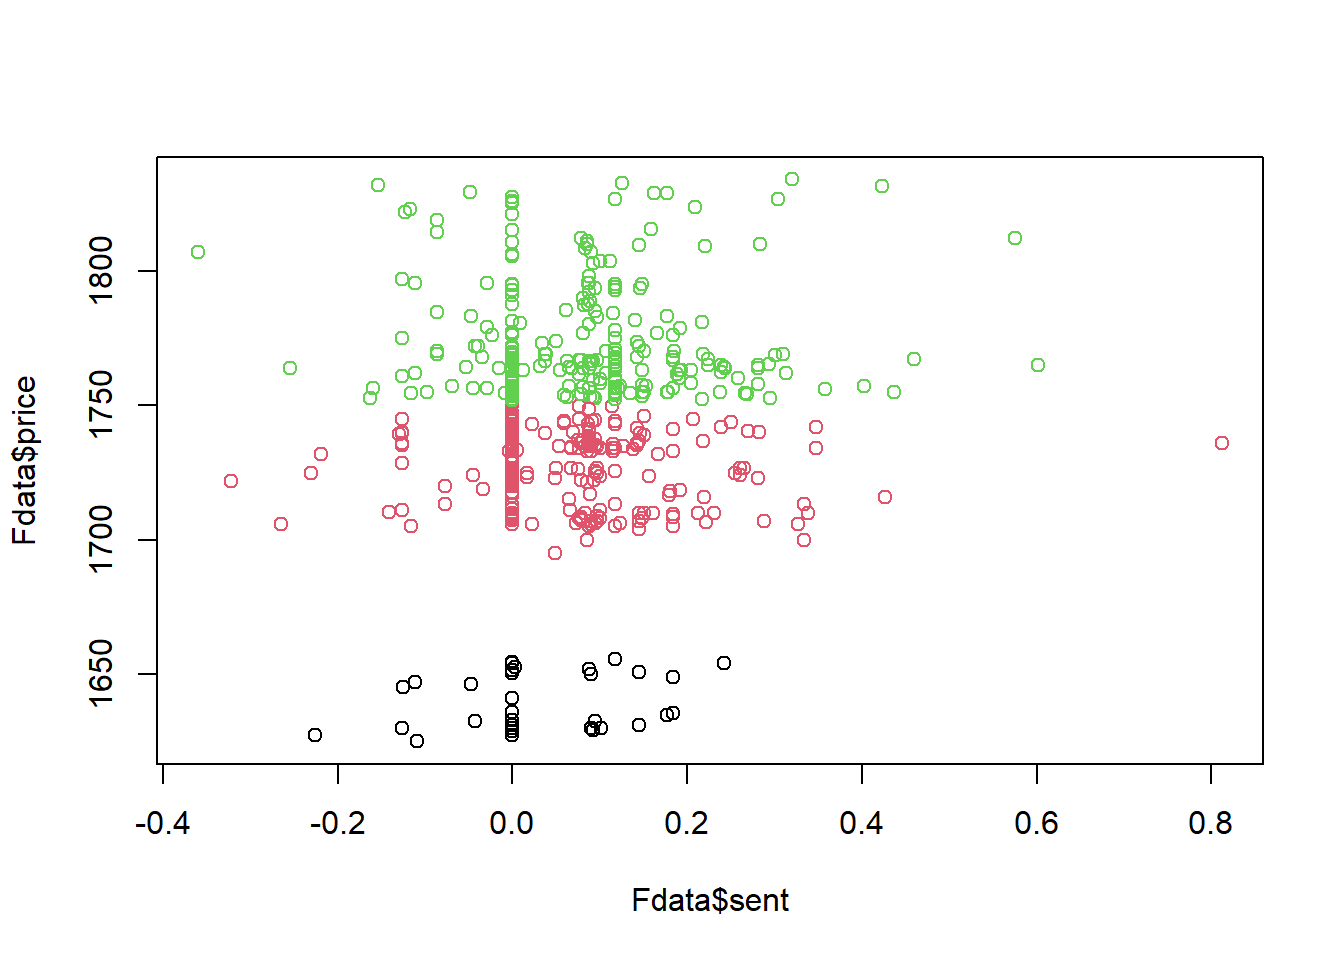

## Regression

In [ ]:
l=lm(Fdata$price~Fdata$sent+k$cluster)
summary(l)


Call:
lm(formula = Fdata$price ~ Fdata$sent + k$cluster)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.748 -16.039  -7.251   3.603  77.723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1715.476      3.429 500.317   <2e-16 ***
Fdata$sent    -9.308     10.794  -0.862    0.389    
k$cluster     18.723      1.483  12.621   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.09 on 373 degrees of freedom
Multiple R-squared:  0.2993,	Adjusted R-squared:  0.2956 
F-statistic: 79.67 on 2 and 373 DF,  p-value: < 2.2e-16


Cluster membership is highly significant.

## Time Series ARIMAX models

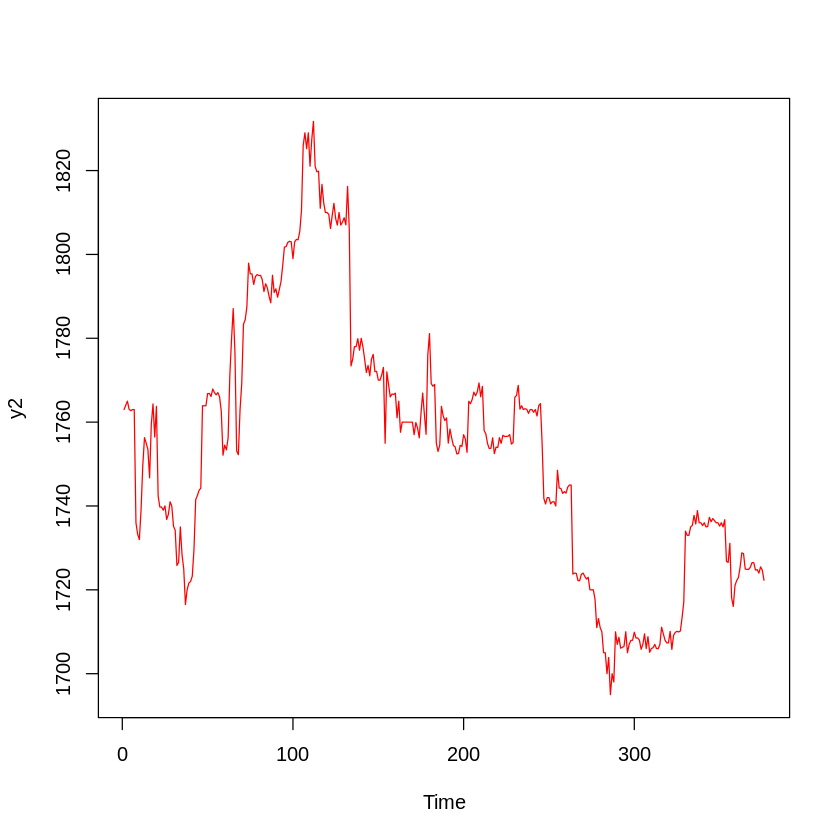

In [ ]:
y2=as.ts(Fdata$price,start=min(Fdata$date),end=max(Fdata$date))
plot(y2,col="red")

In [ ]:
ARIMAX.outno=auto.arima(y = y2)
ARIMAX.outno

Series: y2 
ARIMA(0,1,0) 

sigma^2 estimated as 29.27:  log likelihood=-1165.12
AIC=2332.25   AICc=2332.26   BIC=2336.17

In [ ]:
ARIMAX.out=auto.arima(y = y2, xreg = Fdata$sent)
ARIMAX.out

Series: y2 
Regression with ARIMA(0,1,0) errors 

Coefficients:
         xreg
      -1.4714
s.e.   1.6009

sigma^2 estimated as 29.28:  log likelihood=-1164.7
AIC=2333.4   AICc=2333.44   BIC=2341.26

In [ ]:
#Creating dummy variables
m=ifelse(k$cluster==2,1,0)
n=ifelse(k$cluster==3,1,0)
ARIMAX.out2=auto.arima(y = y2, xreg = as.matrix(data.frame(Fdata$sent,m,n)))
ARIMAX.out2

Series: y2 
Regression with ARIMA(0,1,1) errors 

Coefficients:
          ma1  Fdata.sent        m        n
      -0.2125     -1.1332  30.8224  11.2731
s.e.   0.0594      1.5834   3.3519   1.7030

sigma^2 estimated as 23.75:  log likelihood=-1123.98
AIC=2257.96   AICc=2258.12   BIC=2277.59

In [ ]:
ARIMAX.out3=auto.arima(y = y2, xreg = as.matrix(data.frame(m,n)))
ARIMAX.out3

Series: y2 
Regression with ARIMA(0,1,1) errors 

Coefficients:
          ma1        m        n
      -0.2134  30.8736  11.2966
s.e.   0.0592   3.3507   1.7035

sigma^2 estimated as 23.72:  log likelihood=-1124.23
AIC=2256.47   AICc=2256.58   BIC=2272.18

**Lowest** **AIC/BIC:** ARIMA(0,1,1) with the cluster membership as regressors.

## Ljung-Box Test

In [ ]:
Box.test(ARIMAX.out3$residuals,type="Ljung")


	Box-Ljung test

data:  ARIMAX.out3$residuals
X-squared = 0.023528, df = 1, p-value = 0.8781


Alternate hypothesis is rejected. There is no autocorrelation between residuals

In [ ]:
Box.test(ARIMAX.out3$residuals^2,type="Ljung") 


	Box-Ljung test

data:  ARIMAX.out3$residuals^2
X-squared = 6.6738, df = 1, p-value = 0.009784


Alternate hypothesis is rejected. There is no conditional heteroscedasticity

# Effect of Money Control Portal on intraday data

Moneycontrol is a well known Indian Financial Information portal. Primarily accessed using its mobile application and website, Moneycontrol has become a key source of information for all those who track the Indian stock markets. On every trading day, between 7 AM and 9 AM, Moneycontrol publishes a list of stocks that would be in news for that particular day.



<br>

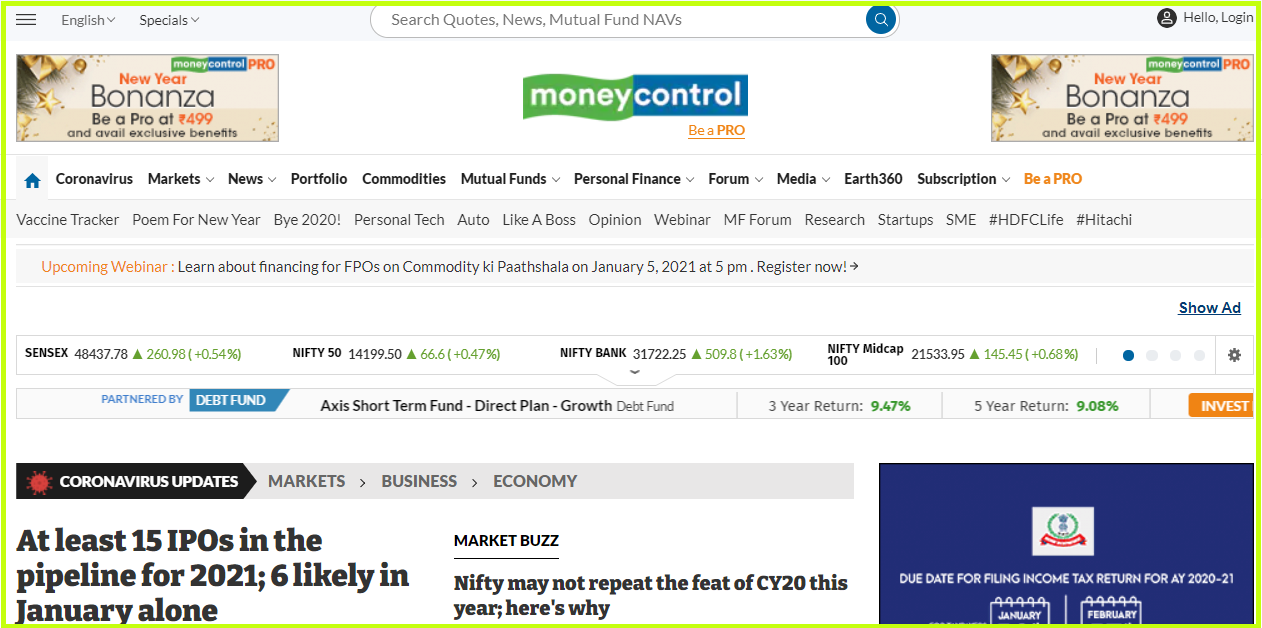

<br>

In this project we aim to see the performance of a trader who takes a long only position in the stocks listed by Moneycontrol. The trader buys the stock at the opening price for the particular stock and sells it at the closing price irrespective of the path movement of the stock. The trader prefers to trade on the National Stock Exchange (NSE) wherever possible. For some stocks which are listed only on the Bombay Stock Exchange (BSE), the trader takes a position in them only if they are not available on NSE.

Since the highest priced stock of Indian Stock Exchanges is MRF(~Rs70,000), we are assuming that the trader puts in Rs 1,00,000 in each trade.Thus if Moneycontrol lists 20 stocks that would be in news for that, the trader will take positions worth Rs 20,00,000 for that day.

To analyse the trades, first we create an MS-Excel workbook titled "FAUR" with 3 worksheets.


*   Worksheet "Stock source" contains the URL of the Moneycontrol article containing the stocks in news for the day along with its date.
*  Worksheet "Stocks" contains the stocks with the dates. The stocks were manually copied from the website. However, a web scraping tool could have been used too.
*   Worksheet "Yahoo Finance Tickers" contains the datewise stock tickers of the stocks in news.

Once we have the Workbook ready, we create a dataframe containing all the stocks.

## Required Packages

In [ ]:
install.packages("quantmod")
install.packages("htmltab")
install.packages("xml2")
install.packages("rvest")
install.packages("openxlsx")

In [ ]:
library(htmltab)
library(xml2)
library(rvest)
library(quantmod)
library(readxl)
library(openxlsx)

## Data Exploration & Pre processing

In [ ]:
stocks <- read_xlsx("FAUR.xlsx",sheet="Stocks")

New names:
* `` -> ...21
* `` -> ...22
* `` -> ...23
* `` -> ...24
* `` -> ...25
* ...



In [ ]:
head(stocks)

44196,Filatex India,Sangam India,FDC,Centum Electronics,Chemcon Special,GMR Infra,Shriram Transport Finance,Coromandel International,Prabhat Technologies India,⋯,...23,...24,...25,...26,...27,...28,...29,...30,...31,...32
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
2020-12-30,Pritish Nandy Communications,Snowman Logistics,Acrysil,CARE Ratings,NDTV,IFGL Refractories,Jindal Stainless Hisar,Lincoln Pharmaceuticals,Mayur Uniquoters,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-12-29,Biocon,HDFC Bank,SBI Life,GE Shipping,3i Infotech,Snowman Logistics,Fineotex Chemical,Sutlej Textiles,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-12-28,RIL,PNB,DLF,Lupin,Coal India,Reliance Capital,Cadila Health,Vedanta,NIIT,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-12-24,Vodafone Idea,Reliance Industries,Vedanta,Majesco,Tata Communications,Dish TV,Den Networks,GTPL Hathway,Hathway Cable,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-12-23,Wipro,Bajaj Auto,Infosys,Jubilant FoodWorks,M&M,Punjab National Bank,Forbes & Company,Aster DM Healthcare,Compuage Infocom,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-12-22,Dr Reddy's,Tata Motors,Thermax,Asian Paints,GTPL Hathway,Resonance Specialties,Wendt,Lupin,Birlasoft,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
comp<-NULL

for(j in 1:nrow(stocks))
{
for (i in 2:ncol(stocks))
{
  comp<-rbind(comp,(stocks[j,][[i]]))
}
}
#creating a dataframe comp with the companies list for searching for the Yahoo Finance ticker

In [ ]:
companies<-unique(comp)
companies[20]=NA
companies<-na.omit(companies)
as.character(companies)
#taking only unique values to avoid searching for stock tickers that have already been found

[1] "Pritish Nandy Communications"                 
  [2] "Snowman Logistics"                            
  [3] "Acrysil"                                      
  [4] "CARE Ratings"                                 
  [5] "NDTV"                                         
  [6] "IFGL Refractories"                            
  [7] "Jindal Stainless Hisar"                       
  [8] "Lincoln Pharmaceuticals"                      
  [9] "Mayur Uniquoters"                             
 [10] "SBI"                                          
 [11] "Paisalo Digital"                              
 [12] "UPL"                                          
 [13] "Jindal Steel & Power"                         
 [14] "APL Apollo Tubes"                             
 [15] "IIFL Securities"                              
 [16] "Biocon"                                       
 [17] "HDFC Bank"                                    
 [18] "SBI Life"                                     
 [19] "3i Infotech"                                  
 [20] "Fineotex Chemical"                            
 [21] "Sutlej Textiles"                              
 [22] "RIL"                                          
 [23] "PNB"                                          
 [24] "DLF"                                          
 [25] "Lupin"                                        
 [26] "Coal India"                                   
 [27] "Reliance Capital"                             
 [28] "Cadila Health"                                
 [29] "Vedanta"                                      
 [30] "NIIT"                                         
 [31] "Spandana Sphoorty Financial"                  
 [32] "Kellton Tech"                                 
 [33] "Sakthi Sugars"                                
 [34] "Engineers India"                              
 [35] "Fiem Industries"                              
 [36] "Vodafone Idea"                                
 [37] "Reliance Industries"                          
 [38] "Majesco"                                      
 [39] "Tata Communications"                          
 [40] "Dish TV"                                      
 [41] "Den Networks"                                 
 [42] "GTPL Hathway"                                 
 [43] "Hathway Cable"                                
 [44] "Bharti Airtel"                                
 [45] "Orient Bell"                                  
 [46] "ARSS Infrastructure"                          
 [47] "Ramkrishna Forgings"                          
 [48] "ACC"                                          
 [49] "Bharat Forge"                                 
 [50] "CG Power"                                     
 [51] "Wipro"                                        
 [52] "Bajaj Auto"                                   
 [53] "Infosys"                                      
 [54] "Jubilant FoodWorks"                           
 [55] "M&M"                                          
 [56] "Punjab National Bank"                         
 [57] "Forbes & Company"                             
 [58] "Aster DM Healthcare"                          
 [59] "Compuage Infocom"                             
 [60] "Archidply Industries"                         
 [61] "Ravinder Heights"                             
 [62] "Genus Paper & Boards"                         
 [63] "Tips Industries"                              
 [64] "BNK Capital Markets"                          
 [65] "Jyoti"                                        
 [66] "Zensar Technologies"                          
 [67] "LT Foods"                                     
 [68] "Dr Reddy's"                                   
 [69] "Tata Motors"                                  
 [70] "Thermax"                                      
 [71] "Asian Paints"                                 
 [72] "Resonance Specialties"                        
 [73] "Wendt"                                        
 [74] "Birlasoft"                                    
 [75] 

In [ ]:
length(companies)

[1] 359

## Using rvest & yahoo search script to find the symbols

Then we use rvest package and Yahoo Finance website to scrape the data from the source code of the webpage.

In [ ]:
#loop for scraping the stock tickers from Yahoo Finance website
tickers<-NULL
for (i in 1:length(companies))
 {
 url<-read_html(paste0('https://query2.finance.yahoo.com/v1/finance/search?q=',gsub(" ","%20",companies[i]),'&quotesCount=6&newsCount=0&enableFuzzyQuery=false&quotesQueryId=tss_match_phrase_query&multiQuoteQueryId=multi_quote_single_token_query&newsQueryId=news_ss_symbols&enableCb=false&enableNavLinks=false&vespaNewsTimeoutMs=600'))
 url
 symbols<-url%>%html_nodes(xpath='body')%>%html_text()
 split<-unlist(strsplit(symbols,"\""))
 tickers<-rbind(tickers,split[grep("symbol",split)[1]+2])
}

In [ ]:
tickers<-na.omit(tickers)
as.character(tickers)

[1] "PNC.NS"         "SNOWMAN.NS"     "ACRYSIL.BO"     "CARERATING.NS" 
  [5] "NDTV.NS"        "IFGLEXPOR.NS"   "JSLHISAR.NS"    "LINCOLN.NS"    
  [9] "MAYURUNIQ.NS"   "SBI"            "PAISALO.NS"     "UPLD"          
 [13] "JINDALSTEL.NS"  "APLAPOLLO.NS"   "IIFLSEC.NS"     "BIOCON.NS"     
 [17] "HDB"            "SBILIFE.NS"     "3IINFOTECH.NS"  "FCL.NS"        
 [21] "SUTLEJTEX.NS"   "RILY"           "PNB.NS"         "DLF.NS"        
 [25] "LUPIN.NS"       "COALINDIA.NS"   "RELCAPITAL.NS"  "CADILAHC.NS"   
 [29] "VEDL"           "NIITLTD.BO"     "SPANDANA.NS"    "KELLTONTEC.NS" 
 [33] "SAKHTISUG.NS"   "ENGINERSIN.NS"  "FIEMIND.NS"     "IDEA.NS"       
 [37] "RELIANCE.NS"    "MAJESCO.NS"     "TATACOMM.NS"    "DISHTV.NS"     
 [41] "DEN.NS"         "GTPL.NS"        "HATHWAY.NS"     "BHARTIARTL.NS" 
 [45] "ORIENTBELL.NS"  "ARSSINFRA.NS"   "RKFORGE.NS"     "ACC"           
 [49] "BHARATFORG.NS"  "1816.HK"        "WIT"            "BAJAJ-AUTO.NS" 
 [53] "INFY"           "JUBLFOOD.NS"    "SI=F"           "PNB.NS"        
 [57] "FLSS"           "ASTERDM.NS"     "COMPINFO.NS"    "ARCHIDPLY.BO"  
 [61] "RVHL.NS"        "GENUSPAPER.BO"  "TIPSINDLTD.NS"  "BNKCAP.BO"     
 [65] "JYOTI.BO"       "ZENSARTECH.NS"  "DAAWAT.NS"      "TTM"           
 [69] "THERMAX.NS"     "ASIANPAINT.NS"  "RESONANCE.BO"   "WENDT.NS"      
 [73] "BSOFT.NS"       "MFSL.NS"        "INDIAGLYCO.NS"  "SOLARINDS.NS"  
 [77] "ASHAPURMIN.NS"  "V2RETAIL.NS"    "MONEYBOXX.BO"   "CYIENT.NS"     
 [81] "AFFLE.NS"       "UJJIVAN.NS"     "OBEROIRLTY.NS"  "IDBI.NS"       
 [85] "PVR.NS"         "KPRMILL.NS"     "INDTERRAIN.NS"  "JKTYRE.NS"     
 [89] "MINDSPACE.BO"   "SALZERELEC.NS"  "LEMONTREE.NS"   "UNIPHOS.BO"    
 [93] "AUBANK.NS"      "INDIGRID-IV.NS" "WALCHANNAG.NS"  "KELLTONTEC.NS" 
 [97] "EMAMILTD.NS"    "EXIDEIND.NS"    "ENERGYDEV.NS"   "JSWSTEEL.NS"   
[101] "RPGLIFE.NS"     "THOMASCOOK.NS"  "BPCL.NS"        "TCS"           
[105] "DCAL.NS"        "BEML.NS"        "PGEL.NS"        "CANBK.NS"      
[109] "POLYPLEX.NS"    "ASTEC.NS"       "BORORENEW.NS"   "SITINET.BO"    
[113] "JKTYRE.NS"      "ASTERDM.NS"     "IRCTC.NS"       "SAGCEM.NS"     
[117] "TORNTPHARM.NS"  "SHILPAMED.NS"   "SHREECEM.NS"    "HDB"           
[121] "SREINFRA.NS"    "CIPLA.NS"       "HEROMOTOCO.NS"  "KEC.NS"        
[125] "POWERGRID.NS"   "MUTHOOTFIN.NS"  "PANACEABIO.NS"  "KOTAKBKETF.NS" 
[129] "PNCINFRA.NS"    "BOBUSD=X"       "MCDOWELL-N.NS"  "SICAL.BO"      
[133] "JAICORPLTD.NS"  "EVEREADY.NS"    "YESBANK.NS"     "IBN"           
[137] "TATASTEEL.NS"   "IRB.NS"         "SAREGAMA.NS"    "SOUTHBANK.NS"  
[141] "VASCONEQ.NS"    "GOACARBON.NS"   "CUPID.BO"       "TMDI"          
[145] "TCPLPACK.BO"    "VIKASMCORP.NS"  "EIMCOELECO.BO"  "BASML.BO"      
[149] "ASHIANA.BO"     "TIIL.NS"        "UNIPLY.NS"      "TATAPOWER.NS"  
[153] "SNSS"           "ONGC.NS"        "ADFFOODS.NS"    "JAGRAN.NS"     
[157] "AXISBANK.NS"    "CENTEXT.BO"     "TATACHEM.NS"    "AREYDRG.BO"    
[161] "HMTV"           "ITDCEM.NS"      "ZODIACLOTH.BO"  "APOLLOHOSP.NS" 
[165] "GAEL.NS"        "INDOCO.NS"      "MCLEODRUSS.NS"  "INFRATEL.BO"   
[169] "EMBASSY.BO"     "MAHMF"          "TDAC"           "SPARC.NS"      
[173] "EICHERMOT.NS"   "HEMIPROP.NS"    "PRAJIND.NS"     "SUBEX"         
[177] "TATACOFFEE.NS"  "KDDL.BO"        "SMLISUZU.NS"    "GODREJIND.NS"  
[181] "HEROMOTOCO.NS"  "XTGLOBAL.BO"    "SAIL"           "MARUTI.NS"     
[185] "FCONSUMER.NS"   "NLCINDIA.NS"    "KALPATPOWR.NS"  "TVSMOTOR.NS"   
[189] "ASHOKLEY.NS"    "HEROMOTOCO.NS"  "AKASHDEEP.BO"   "JTLINFRA.BO"   
[193] "ABFRL.NS"       "ICICIGI.NS"     "ADANIGREEN.NS"  "HFCL.NS"       
[197] "GREAVESCOT.NS"  "TIINDIA.NS"     "VENUSREM.NS"    "ACE.NS"        
[201] "IFL.BO"         "INDOUS.BO"      "JETKINGQ.BO"    "CAMLINFINE.NS" 
[205] "LAURUSLABS.NS"  "TANLA.NS"       "VIKASECO.NS"    "SIEGY"         
[209] "MTEDUCARE.NS"   "TEXRAIL.NS"     "FINEORG.NS"     "RELINFRA.BO"   
[213] "AUB"            "MFSL.NS"        "RELIGARE.NS"    "IRB.NS"        
[217] 

In [ ]:
length(tickers)

[1] 349

## Using the data

Tickers dataframe has all the stock tickers. However, certain tickers aren't mapped correctly. Usually stocks that have the same name as companies listed on international exchanges face this issue (For instance, in case of Pfizer, the stock ticker for the scrip listed on NYSE is read). Thus once we have the list of the tickers, we manually check for any errors and if found so, we rectify them. Then we arrange the tickers columnwise in the worksheet "Yahoo Finance Tickers".

Once this process is over, we run the code to source the data from Yahoo Finance for the particular stock as per the date from the Excel worksheet. Once we have the data for a particular stock on the particular date, we calculate the difference between the opening and closing prices which gives us the return for the stock. Then we multiply the return with the number of shares to give the Profit-loss status of the trade. Once we have the P/L for all the trades for a particular day, we sum it up to get the P/L status for the day. We replicate the code using a while loop for all trading days in the past 2 months (i.e. since 1st November 2020).

We then add the P/L values for each day to get the cumulative profit or loss for all the trades and then divide it by the total amount invested (i.e. number of trades times Rs 100,000) which gives the Return on Invested Capital. Finally, we compare the return with the return given by similar trades done on the benchmark index.

In [ ]:
data <- read_xlsx("FAUR.xlsx",sheet="Yahoo Finance Tickers")

In [ ]:
date <- convertToDate(data[1,])
data <- data[-1,]

capital <- 100000 #per trade size in Rs
k = 1
EOD_Stat = NULL
Trade = NULL
Trade_Temp = NULL
  

In this loop, we are taking each column of the worksheet "Yahoo Finance Tickers" individually. We assign all the stock tickers of the column to tickers and by using getSymbols function, source the data for the particular date. Once we have the data in the form of "Stock.NS" for all the stocks, we run another loop to change the name of the variable. For example, if we have the returns values for ACC.NS which was calculated as ACC.NS\$ret, using the loop replaces the ACC.NS portion to AARTIIND.NS$ret. Thus, we can get the return values for all stocks without writing the code for each one of them again and again.

In [ ]:
  while(k<(ncol(data)+1))
{
  col <- na.omit(data[,k])
  
  tickers = NULL
  for(i in 1:nrow(col))
  {  
    tickers[i] <- as.character(c(col[i,1]))
  }
  
  getSymbols(tickers,from=date[k],to=date[k]+1)
  
  Stockdf=NULL
  
  for(i in 1:length(tickers))
  {
    if(((substr(tickers[i],1,1)) %in% c("1","2","3","4","5","6","7","8","9","0"))==FALSE)
    {
      if((tickers[i] %in% ls()) && (grepl("-",tickers[i], fixed = FALSE)==FALSE)&& (grepl("=",tickers[i], fixed = FALSE)==FALSE))
      {
        temp<-eval(parse(text=paste0("floor(capital/",tickers[i],"$",tickers[i],".Open)")))
        assign(paste0("nosh_",tickers[i]),temp)
        temp2<-eval(parse(text=paste0(tickers[i],"$",tickers[i],".Close-",tickers[i],"$",tickers[i],".Open")))
        assign(paste0("change_",tickers[i]),temp2)
        temp3<-temp*temp2
        assign(paste0("ret_",tickers[i]),temp3)
        if(i!=1)
        {
          nrowtemp<-data.frame(stock=tickers[i],nosh=temp,change=temp2,ret=temp3)
          names(nrowtemp)=c("stock","nosh","change","ret")
          Stockdf=rbind(Stockdf,nrowtemp)
        }
        else
        {
          Stockdf=data.frame(stock=tickers[i],nosh=temp,change=temp2,ret=temp3)
          names(Stockdf)=c("stock","nosh","change","ret")
        }
      }
    }
  }  
  
  #Stockdf_temp <- data.frame(Stockdf) #End of day P/L status
  #names(Stockdf_temp) <- c("stock","nosh","change","ret")
  #Stockdf <- rbind(Stockdf,Stockdf_temp)
  
  EOD_Stat_temp <- data.frame(date[k],sum(Stockdf$ret),nrow(Stockdf)) #End of day P/L status
  names(EOD_Stat_temp) <- c("Date","P/L","No of trades")
  EOD_Stat <- rbind(EOD_Stat,EOD_Stat_temp) 
  
  
  Trade_Temp <- data.frame(Stockdf,date[k])
  names(Trade_Temp) <- c("stock","nosh","change","ret","date")
  Trade <- rbind(Trade,Trade_Temp)
  k=k+1
  
}  

In [ ]:
net_returns <- (sum(EOD_Stat[,2])/(nrow(Trade)*100000))*100

## Daywise returns from strategy

In [ ]:
head(EOD_Stat,20)

,Date,P/L,No of trades
,<date>,<dbl>,<int>
1,2020-12-31,185.5479,19
2,2020-12-30,3124.9076,15
3,2020-12-29,14608.6966,7
4,2020-12-28,10896.5536,15
5,2020-12-24,-23560.2324,17
6,2020-12-23,16644.8084,17
7,2020-12-22,24319.3805,15
8,2020-12-21,-72954.6514,20
9,2020-12-18,-1075.2562,12


## Trade-wise returns from strategy

In [ ]:
head(Trade,20)

,stock,nosh,change,ret,date
,<chr>,<dbl>,<dbl>,<dbl>,<date>
2020-12-31,FILATEX.NS,2125,0.799999,1699.99787,2020-12-31
2020-12-311,SANGAMIND.NS,1254,-2.849999,-3573.89875,2020-12-31
2020-12-312,FDC.NS,299,-1.699982,-508.29462,2020-12-31
2020-12-313,CENTUM.NS,219,-9.900024,-2168.10526,2020-12-31
2020-12-314,CHEMCON.NS,219,44.250000,9690.75000,2020-12-31
2020-12-315,GMRINFRA.NS,3710,-0.450001,-1669.50371,2020-12-31
2020-12-316,SRTRANSFIN.NS,95,3.500000,332.50000,2020-12-31
2020-12-317,COROMANDEL.NS,124,8.699952,1078.79405,2020-12-31
2020-12-318,PTIL.BO,277,0.000000,0.00000,2020-12-31


In [ ]:
as.character(Trade$stock)

[1] "FILATEX.NS"    "SANGAMIND.NS"  "FDC.NS"        "CENTUM.NS"    
  [5] "CHEMCON.NS"    "GMRINFRA.NS"   "SRTRANSFIN.NS" "COROMANDEL.NS"
  [9] "PTIL.BO"       "VGCL.BO"       "INDTERRAIN.NS" "MTEDUCARE.NS" 
 [13] "PATINTLOG.NS"  "SPIC.NS"       "FORTIS.NS"     "ELECTHERM.NS" 
 [17] "ORTINLABSS.NS" "JINDALPOLY.NS" "IOB.NS"        "PNC.NS"       
 [21] "SNOWMAN.NS"    "ACRYSIL.BO"    "CARERATING.NS" "NDTV.NS"      
 [25] "IFGLEXPOR.NS"  "JSLHISAR.NS"   "LINCOLN.NS"    "MAYURUNIQ.NS" 
 [29] "SBIN.NS"       "PAISALO.NS"    "UPL.NS"        "JINDALSTEL.NS"
 [33] "APLAPOLLO.NS"  "IIFLSEC.NS"    "BIOCON.NS"     "HDFCBANK.NS"  
 [37] "SBILIFE.NS"    "GESHIP.NS"     "SNOWMAN.NS"    "FCL.NS"       
 [41] "SUTLEJTEX.NS"  "RELIANCE.NS"   "PNB.NS"        "DLF.NS"       
 [45] "LUPIN.NS"      "COALINDIA.NS"  "RELCAPITAL.NS" "CADILAHC.NS"  
 [49] "VEDL.NS"       "NIITLTD.NS"    "SPANDANA.NS"   "KELLTONTEC.NS"
 [53] "PAISALO.NS"    "SAKHTISUG.NS"  "ENGINERSIN.NS" "FIEMIND.NS"   
 [57] "IDEA.NS"       "RELIANCE.NS"   "VEDL.NS"       "MAJESCO.NS"   
 [61] "TATACOMM.NS"   "DISHTV.NS"     "DEN.NS"        "GTPL.NS"      
 [65] "HATHWAY.NS"    "BHARTIARTL.NS" "SNOWMAN.NS"    "ORIENTBELL.NS"
 [69] "ARSSINFRA.NS"  "RKFORGE.NS"    "ACC.NS"        "BHARATFORG.NS"
 [73] "CGPOWER.NS"    "WIPRO.NS"      "INFY.NS"       "JUBLFOOD.NS"  
 [77] "PNB.NS"        "FORBESCO.BO"   "ASTERDM.NS"    "COMPINFO.NS"  
 [81] "MAJESCO.NS"    "SNOWMAN.NS"    "ARCHIDPLY.NS"  "RVHL.NS"      
 [85] "GENUSPAPER.NS" "TIPSINDLTD.NS" "BNKCAP.BO"     "JYOTI.BO"     
 [89] "ZENSARTECH.NS" "DAAWAT.NS"     "DRREDDY.NS"    "TATAMOTORS.NS"
 [93] "THERMAX.NS"    "ASIANPAINT.NS" "GTPL.NS"       "RESONANCE.BO" 
 [97] "WENDT.NS"      "LUPIN.NS"      "BSOFT.NS"      "MAJESCO.NS"   
[101] "MFSL.NS"       "INDIAGLYCO.NS" "SOLARINDS.NS"  "ASHAPURMIN.NS"
[105] "V2RETAIL.NS"   "INFY.NS"       "RELIANCE.NS"   "AFFLE.NS"     
[109] "UJJIVAN.NS"    "OBEROIRLTY.NS" "PNB.NS"        "LUPIN.NS"     
[113] "IDBI.NS"       "PVR.NS"        "KPRMILL.NS"    "APLAPOLLO.NS" 
[117] "COMPINFO.NS"   "INDTERRAIN.NS" "JKTYRE.NS"     "SNOWMAN.NS"   
[121] "AUBANK.NS"     "KELLTONTEC.NS" "EMAMILTD.NS"   "EXIDEIND.NS"  
[125] "JSWSTEEL.NS"   "BPCL.NS"       "TCS.NS"        "DCAL.NS"      
[129] "BEML.NS"       "MAJESCO.NS"    "PGEL.NS"       "CANBK.NS"     
[133] "POLYPLEX.NS"   "EMAMILTD.NS"   "ASTEC.NS"      "BORORENEW.NS" 
[137] "INDTERRAIN.NS" "WIPRO.NS"      "SITINET.NS"    "JKTYRE.NS"    
[141] "ASTERDM.NS"    "IRCTC.NS"      "SAGCEM.NS"     "JUBLFOOD.NS"  
[145] "TORNTPHARM.NS" "SNOWMAN.NS"    "SHILPAMED.NS"  "PNB.NS"       
[149] "BIOCON.NS"     "IDBI.NS"       "MAJESCO.NS"    "SHREECEM.NS"  
[153] "JINDALSTEL.NS" "HDFC.NS"       "SREINFRA.NS"   "CIPLA.NS"     
[157] "JINDALSTEL.NS" "JSWSTEEL.NS"   "HEROMOTOCO.NS" "KEC.NS"       
[161] "POWERGRID.NS"  "MUTHOOTFIN.NS" "PANACEABIO.NS" "SNOWMAN.NS"   
[165] "KOTAKBANK.NS"  "TCS.NS"        "PNCINFRA.NS"   "MUTHOOTFIN.NS"
[169] "BANKBARODA.NS" "TCS.NS"        "SICAL.NS"      "JAICORPLTD.NS"
[173] "EVEREADY.NS"   "SNOWMAN.NS"    "VARROC.NS"     "V2RETAIL.NS"  
[177] "TCS.NS"        "YESBANK.NS"    "ICICIBANK.NS"  "JSWSTEEL.NS"  
[181] "TATASTEEL.NS"  "IRB.NS"        "SAREGAMA.NS"   "INDIANB.NS"   
[185] "PAISALO.NS"    "VASCONEQ.NS"   "GOACARBON.BO"  "CUPID.NS"     
[189] "TITAN.NS"      "TCPLPACK.NS"   "CANBK.NS"      "VIKASMCORP.NS"
[193] "EIMCOELECO.NS" "BASML.NS"      "ASHIANA.NS"    "INDTERRAIN.NS"
[197] "TIIL.NS"       "UNIPLY.NS"     "RELIANCE.NS"   "ICICIBANK.NS" 
[201] "TATAPOWER.NS"  "SUNPHARMA.NS"  "ONGC.NS"       "ADFFOODS.NS"  
[205] "JAGRAN.NS"     "AXISBANK.NS"   "CENTEXT.NS"    "TATACHEM.NS"  
[209] "AREYDRG.BO"    "HMT.NS"        "ZODIACLOTH.NS" "APOLLOHOSP.NS"
[213] "WIPRO.NS"      "JINDALSTEL.NS" "GAEL.NS"       "ASIANPAINT.NS"
[217] "INDOCO.NS"     "MCLEODRUSS.NS" "SNOWMAN.NS"    "TATACHEM.NS"  
[221] "INFRATEL.BO"   "GGENG.BO"      "TRIDENT.NS"    "SPARC.NS"     
[225] "TATAMOTORS.NS" "DRREDDY.NS"    "EICHERMOT.NS"  "VIKASMCORP.NS"
[229] "HEMIP

## Graphical Analysis

### Plotting the total returns daywise 

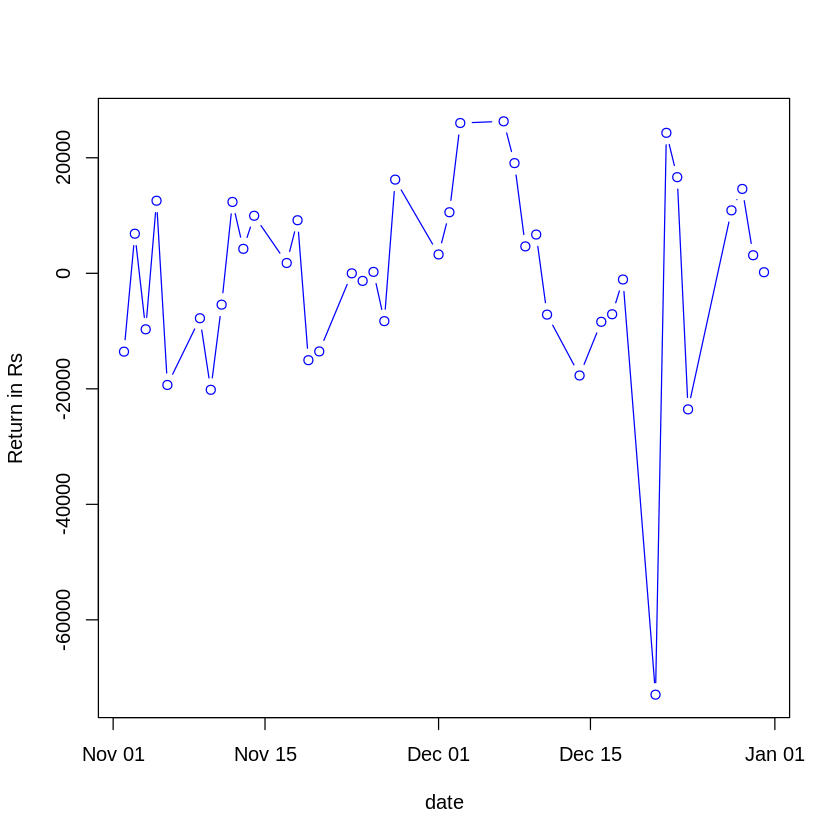

In [ ]:
plot(EOD_Stat$Date, EOD_Stat$`P/L`,type="b",xlab = "date",ylab = "Return in Rs",col="blue")

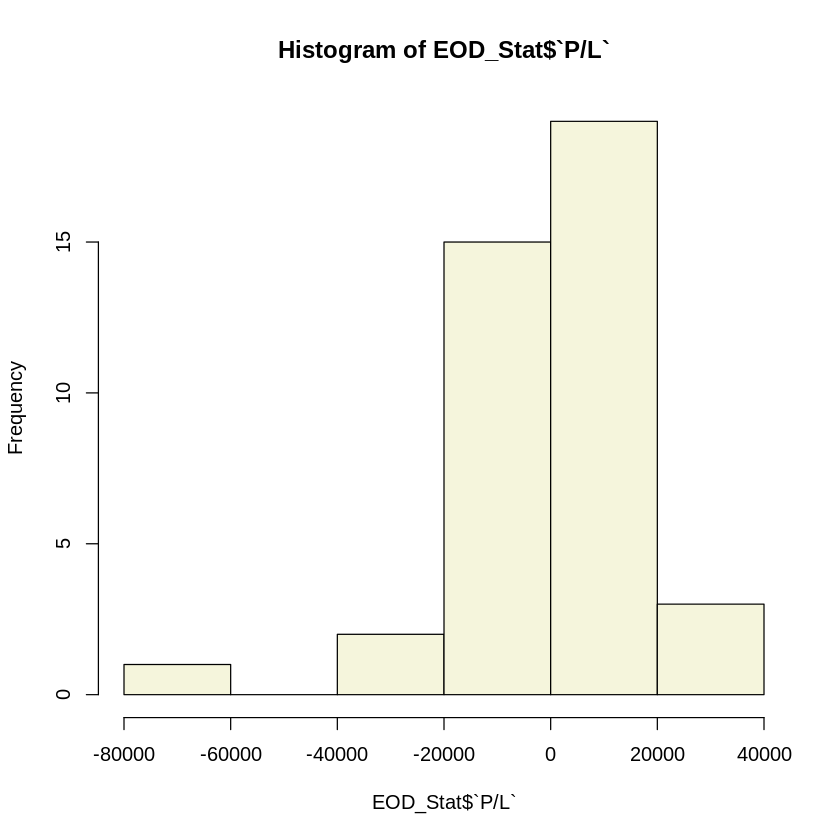

In [ ]:
hist(EOD_Stat$`P/L`,col="beige")

We can see from the graphs that the returns are distributed around 0.

### Plotting the returns daywise for each day

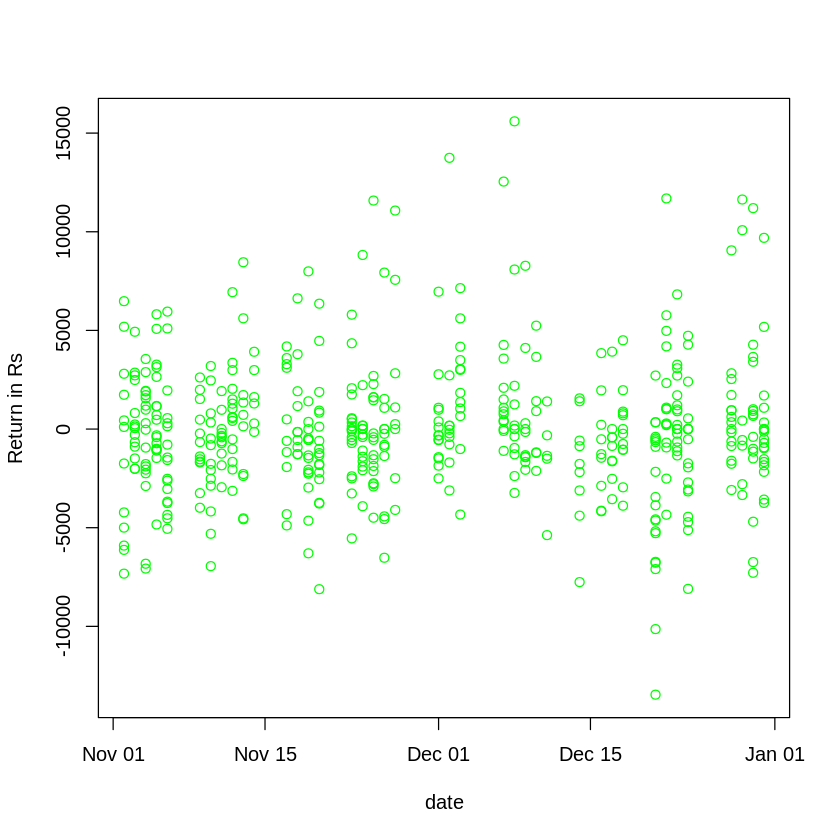

In [ ]:
plot(Trade$date,Trade$ret,ylab="Return in Rs",xlab = "date",col="green")

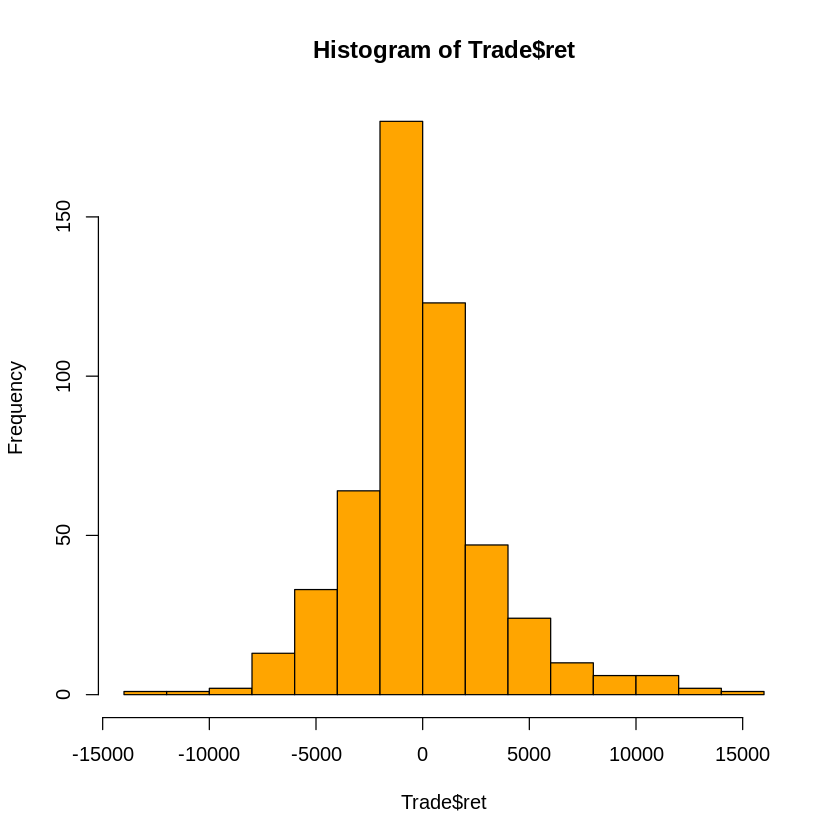

In [ ]:
hist(Trade$ret,col="orange")

We can see from the graphs that the returns are distributed around 0 with a slight negative bias. Further, the returns are similar to that of a normal distribution.

### Plotting the range of total returns using boxplot

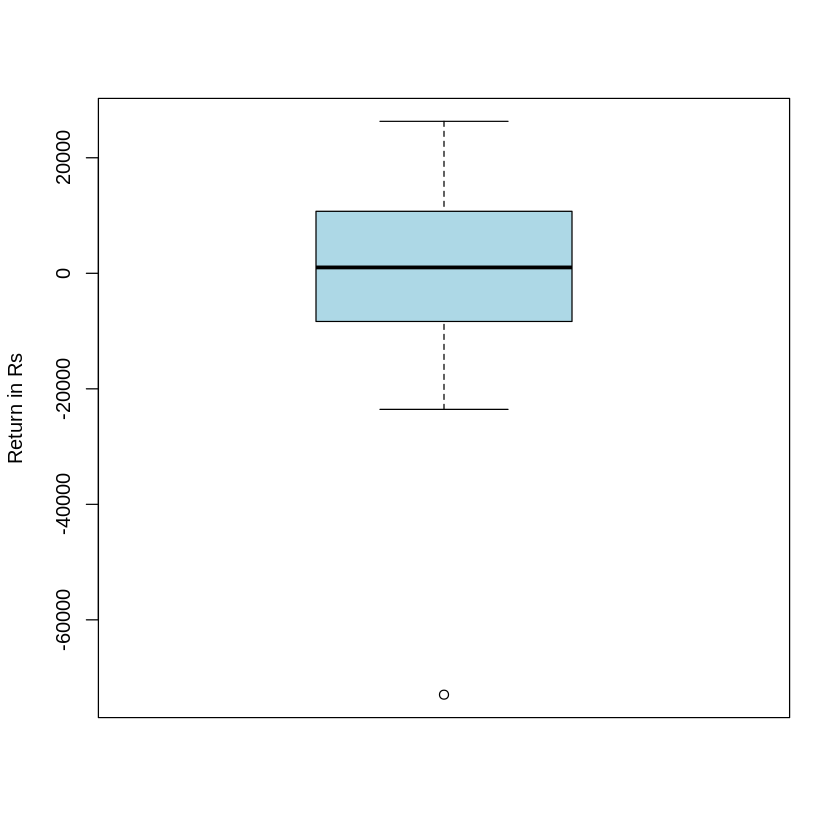

In [ ]:
boxplot(EOD_Stat$`P/L`,ylab="Return in Rs",col="light blue")

As highlighted earlier, returns are around 0 with a few major outliers.

### Plotting the range of individual returns using boxplot

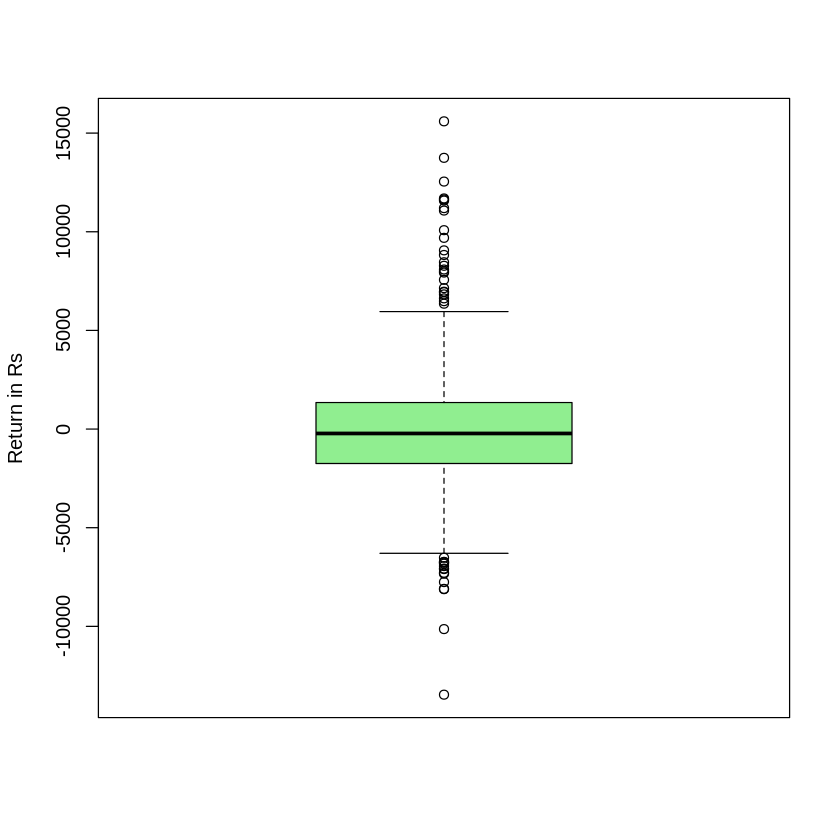

In [ ]:
boxplot(Trade$ret,ylab="Return in Rs",col="light green")

## NIFTY Comparision

In [ ]:
Comp_Benchmark <- NULL

Comp_Benchmark <- data.frame(date,EOD_Stat$`No of trades`)
#df2=df1[order(nrow(df1):1),]

benchmark = NULL
j=1
EOD_nifty = NULL

while(j<(ncol(data)+1))
{getSymbols("^NSEI",from=date[j],to=date[j]+1)
 nifty.ret = (NSEI$NSEI.Close/NSEI$NSEI.Open-1)*100
 
 EOD_nifty_temp <- data.frame(date[j],nifty.ret) #End of day P/L status
 names(EOD_nifty_temp) <- c("Date","P/L")
 EOD_nifty <- rbind(EOD_nifty,EOD_nifty_temp) 
 
 j= j+1
}

In [ ]:
#Manually need to add the change for 14th November as 
#Yahoo Finance doesn't have the index values
ind.ret <- ((12780.25/12823.35)-1)*100

EOD_nifty_temp <- data.frame(as.Date("2020-11-14"),ind.ret)
names(EOD_nifty_temp) <- c("Date","P/L")
EOD_nifty <- rbind(EOD_nifty,EOD_nifty_temp) 



In [ ]:
#Retrieving data from 2nd to 3rd November
j=j+1
while(j<(ncol(data)+1))
{getSymbols("^NSEI",from=date[j],to=date[j]+1)
  nifty.ret = (NSEI$NSEI.Close/NSEI$NSEI.Open-1)*100
  
  EOD_nifty_temp <- data.frame(date[j],nifty.ret) #End of day P/L status
  names(EOD_nifty_temp) <- c("Date","P/L")
  EOD_nifty <- rbind(EOD_nifty,EOD_nifty_temp) 
  
  j= j+1
}

#Calculating NIFTY returns for same number 
#of trades as made on the particular day
arr.df <- data.frame(1+(EOD_nifty$`P/L`/100))
port <- data.frame(EOD_Stat$`No of trades`*100000)
ret.df <- port*(arr.df-1)
names(ret.df) = c("P/L")

## Head to head comparision

In [ ]:
EOD_ret <- data.frame(EOD_Stat$Date,ret.df,EOD_Stat$`P/L`)
names(EOD_ret)[1] <- "Date"
names(EOD_ret)[2] <- "Nifty returns"
names(EOD_ret)[3] <- "Moneycontrol Returns"

head(EOD_ret,20)

,Date,Nifty returns,Moneycontrol Returns
,<date>,<dbl>,<dbl>
1,2020-12-31,1598.06729,185.5479
2,2020-12-30,112.63266,3124.9076
3,2020-12-29,1119.66992,14608.6966
4,2020-12-28,6302.84170,10896.5536
5,2020-12-24,9586.59257,-23560.2324
6,2020-12-23,16099.70203,16644.8084
7,2020-12-22,10391.63706,24319.3805
8,2020-12-21,-60180.90486,-72954.6514
9,2020-12-18,-335.69956,-1075.2562


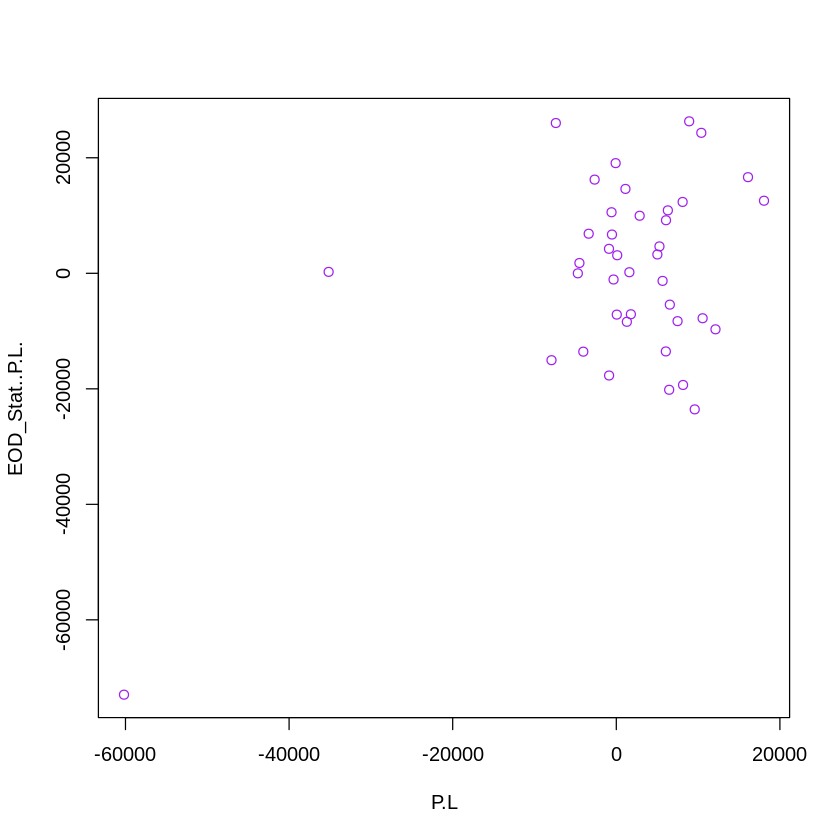

In [ ]:
plot(data.frame(ret.df,EOD_Stat$`P/L`),col="purple")

## Plotting returns together

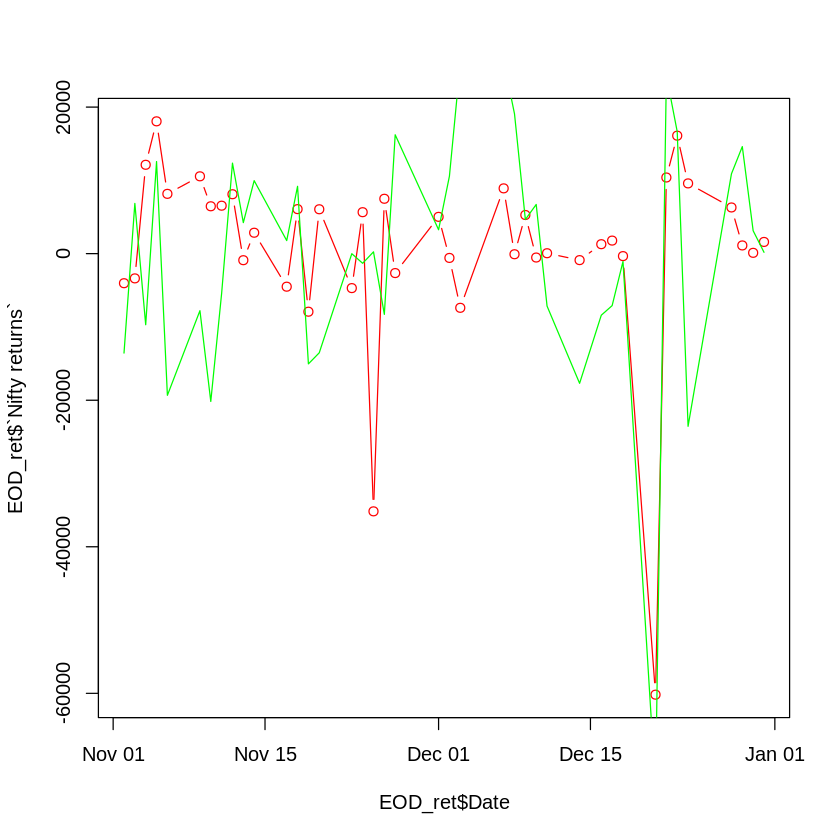

In [ ]:
plot(EOD_ret$Date,EOD_ret$`Nifty returns`,type="b",col="red")
lines(EOD_ret$Date,EOD_ret$`Moneycontrol Returns`,col="green")

## Net returns

In [ ]:
nifty_net <- sum(ret.df)

net <- (nifty_net/(nrow(Trade)*100000))*100

strategy <-data.frame(net,net_returns)

names(strategy)[1] <- "Nifty Returns"
names(strategy)[2] <- "Moneycontrol Returns"

strategy

Nifty Returns,Moneycontrol Returns
<dbl>,<dbl>
0.06328161,-0.02397539


Thus there is marginal difference in the returns between the two strategies.

## Shortcomings of the project

The project is based on a number of assumptions that we have taken for simplifying the code required to run the strategy. Following are the key ones amongst them:-




*  Ideally, a good trade should evaluate whether they should go long or short in the stock depending on the news. In this code we have taken long only positions

* Transaction costs such as brokerage and STT have been ignored

* Certain stocks with tickers containing symbols (such as M&M) weren't retrievable from Yahoo Finance

* Penny stocks (especially those from BSE) have also been included in the trading. In the real world, many of them have really low volumes compared to which our trading volumes are much high. Further, the high number of orders for a penny stock can significantly alter the price of the scrip. Lastly, these stocks are extremely vulnerable to operator driven price movements which makes the effect of news negligible

* Certain stocks from BSE weren't retrievable from Yahoo Finance despite repeated attempts

* In the real world, putting high volume of orders can significantly alter the price of stock for the moment which makes it impossible to obtain stocks at a given price (unless it is a limit order - which, in the absence of volumes, may not execute). Further, we have assumed we will be able to buy all the stocks at the open price which might not be the case

* Retrieving data from Yahoo Finance is fraught with download failures. The situation would not be so when executing orders from an established broker like Zerodha or Sharekhan

* The analysis has been done on the past 2 months which have been a good period for the market as a whole on the back of news of a coronavirus vaccine and cases subsiding in the country. A similar analysis could be done for other/longer periods to see the impact


# References

1. Goonatilake, Rohitha & Herath, Susantha. (2007). The Volatility of the Stock Market and News. International Research Journal of Finance and Economics. 

2. Deveikyte, J., Geman, H., Piccari, C., & Provetti, A. (2020). A Sentiment Analysis Approach to the Prediction of Market Volatility. Procedia Computer Science

3. Colonescu, C. (2018). The Effects of Donald Trump’s Tweets on US Financial and Foreign Exchange Markets. Athens Journal of Business & Economics.

4. Zhang, Xue & Fuehres, Hauke & Gloor, Peter. (2011). Predicting Stock Market Indicators Through Twitter – “I Hope it is Not as Bad as I Fear. Procedia - Social and Behavioral Sciences.